# K-Means Clustering
- Distance based: we make clusters based on Euclidean distance to match similarity
- Centroid based: centroid is center of any cluster
- Iterative :improve cluster with repeated refinement



   CustomerID  Age  AnnualIncome  SpendingScore  Cluster
0           1   25         25000             30        2
1           2   45         60000             70        1
2           3   35         40000             50        0
3           4   23         20000             20        2
4           5   52         80000             90        1
5           6   40         50000             60        0


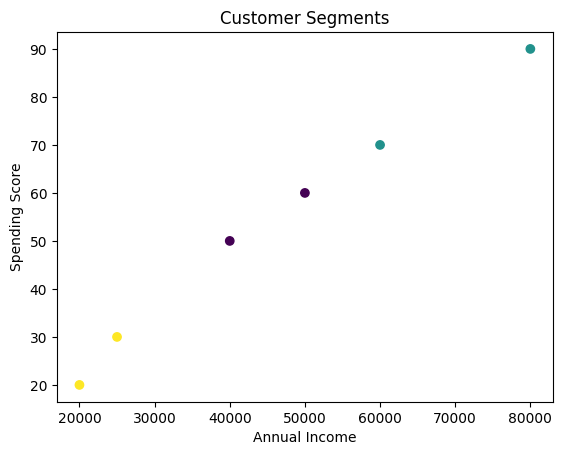

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# data = {
#     'CustomerID': [1,2,3,4,5,6],
#     'Age': [25,45,35,23,52,40],
#     'AnnualIncome': [25000,60000,40000,20000,80000,50000],
#     'SpendingScore': [30,70,50,20,90,60]
# }
data = {
    'CustomerID': [1,2,3,4,5,6],
    'Age': [25,45,35,23,52,40],
    'AnnualIncome': [25000,60000,40000,20000,80000,50000],
    'SpendingScore': [30,70,50,20,90,60]
}
df = pd.DataFrame(data)

X=df[['Age','AnnualIncome','SpendingScore']]

scaler = StandardScaler()
X_s = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3,random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

print(df)

plt.scatter(df['AnnualIncome'],df['SpendingScore'],c=df['Cluster'],cmap='viridis')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.show()

     CustomerID  Age  AnnualIncome  SpendingScore  Cluster
0             1   69         19191             53        0
1             2   56         81054             45        1
2             3   61         38536             29        0
3             4   48         60675             26        2
4             5   33         30454             43        0
..          ...  ...           ...            ...      ...
495         496   22         20680             62        0
496         497   20         71116             26        2
497         498   66         70201             83        2
498         499   20         75342             25        1
499         500   52         69145             52        2

[500 rows x 5 columns]


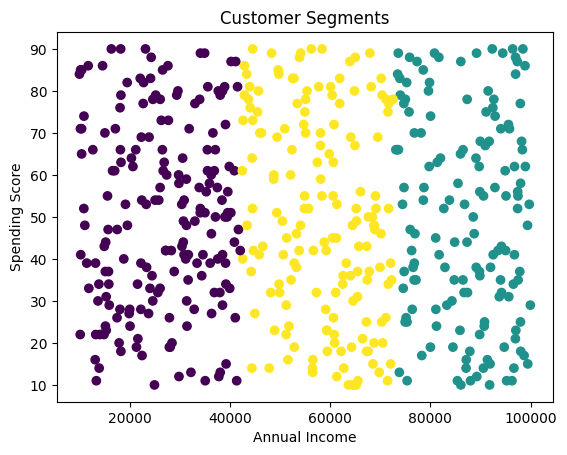

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = {
    'CustomerID': np.arange(1,501),
    'Age': np.random.randint(18,70,500),
    'AnnualIncome': np.random.randint(10000,100000,500),
    'SpendingScore': np.random.randint(10,91,500)
}
df = pd.DataFrame(data)

X=df[['Age','AnnualIncome','SpendingScore']]

scaler = StandardScaler()
X_scaled  = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3,random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

print(df)

plt.scatter(df['AnnualIncome'],df['SpendingScore'],c=df['Cluster'],cmap='viridis')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.show()

Example: Hospital Patient Segmentation 🏥
Business Context
A hospital wants to improve patient care and resource allocation. Instead of treating all
patients the same, they want to group them into segments based on health and lifestyle data.
 This helps with:
- Designing personalized treatment plans
- Predicting high‑risk patients
- Managing hospital resources more efficiently

Dataset (simplified)
Features we might use:
- Age
- BMI (Body Mass Index)
- Number of yearly hospital visits
- Chronic conditions count

   PatientID  Age  BMI  HospitalVisits  ChronicConditions  Cluster
0        101   25   22               1                  0        2
1        102   60   30               5                  2        1
2        103   45   28               3                  1        0
3        104   30   24               2                  0        2
4        105   70   35               7                  3        1
5        106   50   27               4                  1        0


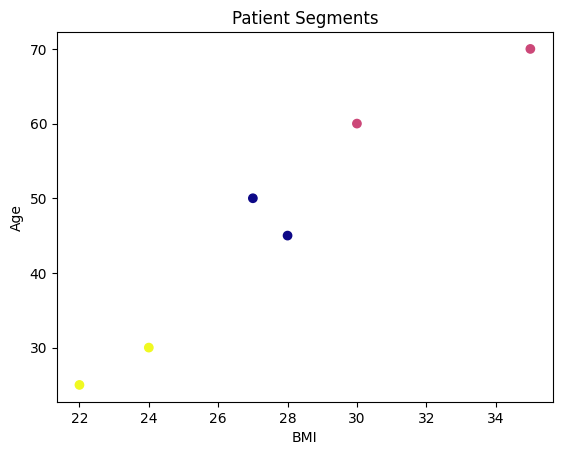

In [19]:
data = {
    'PatientID': [101,102,103,104,105,106],
    'Age': [25,60,45,30,70,50],
    'BMI': [22,30,28,24,35,27],
    'HospitalVisits': [1,5,3,2,7,4],
    'ChronicConditions': [0,2,1,0,3,1]
}
df = pd.DataFrame(data)

X=df[['Age','BMI','HospitalVisits','ChronicConditions']]

kmeans = KMeans(n_clusters=3,random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
print(df)
plt.scatter(df['BMI'],df['Age'],c=df['Cluster'],cmap='plasma')
plt.ylabel('Age')
plt.xlabel('BMI')
plt.title('Patient Segments')
plt.show()

# HOW TO CHOOSE THE RIGHT K?
ELBOW METHOD
- plot the sum of squared distances from points to centroids vs the number of clusters . Look for the "elbow" where rate of decrease sharply changes
SILHOUETTE ANALYSIS
- Measures how similar a point is to its own cluster compared to other clusters. Higher Silhouette scores indicate better clustering

Scenario Question 💼
A telecommunications company has collected data on 500 customers, including their monthly bill
amount, average call duration, internet usage, and number of support calls. The company wants
to group customers into meaningful segments to design targeted marketing campaigns and improve customer
 service.
You are tasked with:
- Using K‑Means clustering to explore possible customer segments.
- Applying the Elbow Method to determine where adding more clusters stops giving significant improvement.
- Using the Silhouette Score to validate which number of clusters produces the most well‑separated
and meaningful groups.


Scenario Question 💼
A telecommunications company has collected data on 500 customers, including their monthly bill amount, average call duration, internet usage, and number of support calls. The company wants to group customers into meaningful segments to design targeted marketing campaigns and improve customer service.
You are tasked with:
- Using K‑Means clustering to explore possible customer segments.
- Applying the Elbow Method to determine where adding more clusters stops giving significant improvement.
- Using the Silhouette Score to validate which number of clusters produces the most well‑separated and meaningful groups

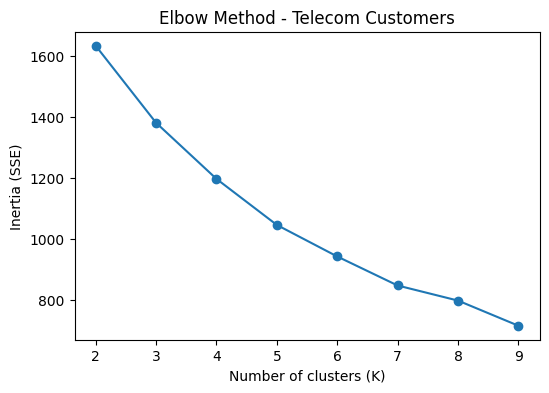

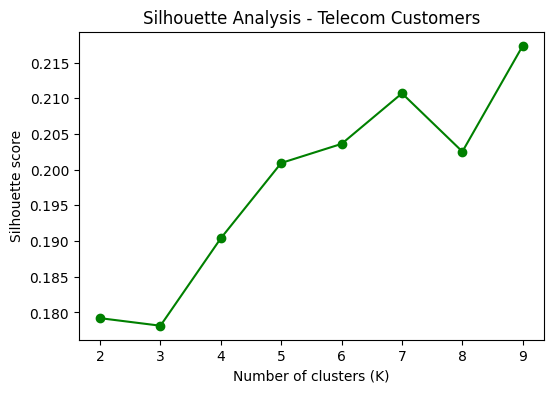

Best K based on silhouette score: 9


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
data = {
    'CustomerID': range(1, 501),
    'MonthlyBill': np.random.randint(20, 200, 500),       # monthly bill in $
    'CallDuration': np.random.randint(50, 500, 500),      # avg monthly call minutes
    'InternetUsage': np.random.randint(10, 300, 500),     # GB per month
    'SupportCalls': np.random.randint(0, 10, 500)         # number of support calls
}
df = pd.DataFrame(data)

X=df[['MonthlyBill','CallDuration','InternetUsage','SupportCalls']]

scaler = StandardScaler()
X_scaled  = scaler.fit_transform(X)

inertia = []
k_range = range(2,10)

for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_range,inertia,marker='o')
plt.title('Elbow Method - Telecom Customers')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (SSE)')
plt.show()

silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=42)
    label = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled,label))

plt.figure(figsize=(6,4))
plt.plot(k_range,silhouette_scores,marker='o',color='green')
plt.title('Silhouette Analysis - Telecom Customers')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette score')
plt.show()
plt.show()

best_k = max(k_range)
print(f'Best K based on silhouette score: {best_k}')

🎬 Scenario: Movie Streaming Platform
A movie streaming company has collected data on 1,000 users, including:
- Average watch time per week
- Preferred genres (action, comedy, drama, etc.)
- Number of devices used (TV, phone, tablet)
- Frequency of subscription pauses or cancellations
The company wants to group users into meaningful segments to:
- Recommend personalized movie lists
- Design loyalty rewards for binge‑watchers
- Identify users at risk of canceling subscriptions
Your Tasks
- Apply K‑Means clustering to explore possible user segments.
- Example clusters: “Weekend binge‑watchers,” “Casual family viewers,” “Genre loyalists.”
- Use the Elbow Method to find the point where adding more clusters doesn’t improve grouping much.
- This helps decide whether 3, 4, or 5 clusters make sense.
- Validate with Silhouette Score to check if the chosen clusters are well‑separated and meaningful.
- Ensures that “binge‑watchers” aren’t mixed up with “casual viewers.”

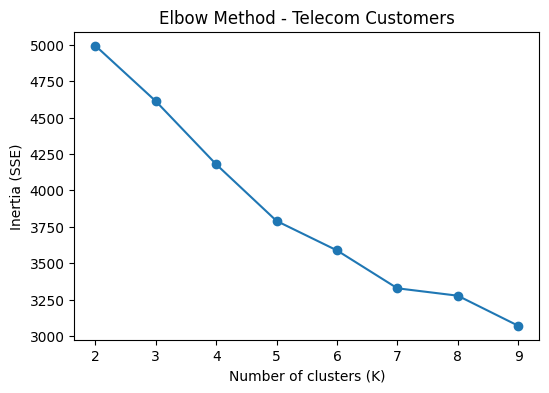

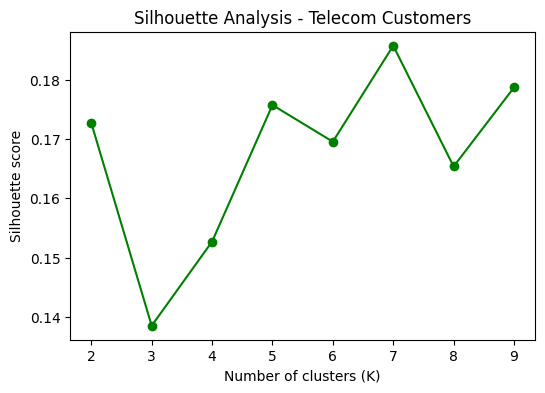

Best K based on silhouette score: 9


In [29]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

np.random.seed(42)

data = {
    'WatchTime': np.random.randint(2, 40, 1000),        # hours/week
    'Devices': np.random.randint(1, 5, 1000),           # number of devices
    'PauseFreq': np.random.randint(0, 6, 1000),         # pauses/month
    'ActionPref': np.random.randint(0, 2, 1000),
    'ComedyPref': np.random.randint(0, 2, 1000),
    'DramaPref': np.random.randint(0, 2, 1000)
}

df = pd.DataFrame(data)
df
X=df[['WatchTime','Devices','PauseFreq','ActionPref','ComedyPref','DramaPref']]
scaler = StandardScaler()
X_scaled  = scaler.fit_transform(X)

inertia = []
k_range = range(2,10)

for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_range,inertia,marker='o')
plt.title('Elbow Method - Telecom Customers')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (SSE)')
plt.show()

silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=42)
    label = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled,label))

plt.figure(figsize=(6,4))
plt.plot(k_range,silhouette_scores,marker='o',color='green')
plt.title('Silhouette Analysis - Telecom Customers')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette score')
plt.show()
plt.show()

best_k = max(k_range)
print(f'Best K based on silhouette score: {best_k}')